# COGS 108 - Final Project

# Overview
My project analyzes the relationship between the asthma percentile and the percentile of minorities who live half a mile from parks in San Diego. My goal is to determine if having access to nearby parks improves the overall health specifically of those who live in minoritiy communities. The result of this project reveals that there is a positive relationship, indicating that having access to nearby parks actually worsens their overall health, which is determined by their asthma percentile.

# Name & GitHub
- Name: Mai Vo
- GitHub Username: maivo0605

# Research Question
Does having access to nearby parks improve the overall health of minorities who live half a mile from parks in San Diego?

# Background and Prior Work
Public parks are critical resources for physical activity especially among minority communities[1]. According to the American Journal of Preventive Medicine, regular physical activity helps reduce morbidity and mortality by decreasing heart disease, diabetes, high blood pressure, colon cancer, feelings of depression/ anxiety, and weight, while building and maintaining healthy bones, muscles, and joints[2]. They also revealed that studies have shown that older adults, racial/ethnic minorities, females, and lower-income families are less likely to use parks. This might be due to lack of time, money, personal health, information, transportation, and access, etc. 

The US National Library of Medicine National Institutes of Health also agreed that males were twice as likely to be vigorously active than females. Parks-goers with different gender, race/ethnicity, age group, and their activity level were observed in 8 public parks, 4 times per day, 7 days per week. Additionally, they interviewed 713 park users and 605 area residents living within 2 miles of each park. They concluded in their findings that with the increasing population in minority communities, the number of available parks is insufficient to serve everyone in those areas.	

References: 
<br> <br>
1) Contribution of Public Parks to Physical Activity <br>(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1805017/)<br>
<br>
2) The Significance of Parks to Physical Activity and Public Health <br> (https://www.ajpmonline.org/article/S0749-3797(04)00304-6/fulltext)

# Hypothesis
Studies have shown that people in minority communities are less likely to use parks due to lack of time, transportation, and access, which therefore increase their risk of being physically healthy. Since it has been proven that having access to nearby parks increases the physical activity level, I hypothesize that having this access would improve the overall health of minority communities who live half a mile from parks in San Diego.

# Dataset(s)

Dataset Name: CA Access to Parks
- Link to the dataset: https://data.ca.gov/dataset/park-beach-open-space-or-coastline-access
- Number of observations: 1048575 observations
- Description: This dataset showcases the percentage of population within half a mile of parks, beach, open space or coastline for California, its regions, counties, county subdivisions, cities, towns, and census tracts from 2010.
<br>

Dataset Name: California Environmental Health Screening
- Link to the dataset: https://data.ca.gov/dataset/calenviroscreen-2-0
- Number of observations: 8035 observations
- Description: This dataset identifies California communities that are disproportionately burdened by multiple sources of pollution, for instance, pollution, drinking water, traffic, etc.
<br> <br>
Both datasets are merged on the census tract value, that allows the analysis of the relationship between the asthma percentile and the percentile of minorities who live close to parks. The merged dataset has 18810 observations.

# Setup

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')
import patsy
import statsmodels.api as sm

In [2]:
#Read data
df_access = pd.read_csv(r'C:\Users\gbzme\AppData\Local\Temp\hci_accesstoparks_469_ca_re_co_cd_pl_ct-7-3-2017-ada.csv', encoding = 'latin-1')
df_screen = pd.read_csv('https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/calenviroscreen-final-report.csv')

#Convert all data to whole numbers
pd.set_option('display.float_format','{:.0f}'.format)

C:\Users\gbzme\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,4,5,7,9,11,13,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_access

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_fips,county_name,...,numerator,denominator,estimate,ll_95ci,ul_95ci,se,rse,ca_decile,ca_rr,version
0,469,"Percent of Population within 1/2 Mile of Park,...",2010,1,AIAN,CA,6,California,nan,NaN,...,78625,162250,48,48,49,0,0,nan,1,7/3/2017
1,469,"Percent of Population within 1/2 Mile of Park,...",2010,1,AIAN,CA,6,California,nan,NaN,...,11839,162250,7,7,7,0,1,nan,1,7/3/2017
2,469,"Percent of Population within 1/2 Mile of Park,...",2010,1,AIAN,CA,6,California,nan,NaN,...,12338,162250,8,7,8,0,1,nan,1,7/3/2017
3,469,"Percent of Population within 1/2 Mile of Park,...",2010,1,AIAN,CA,6,California,nan,NaN,...,4926,162250,3,3,3,0,1,nan,1,7/3/2017
4,469,"Percent of Population within 1/2 Mile of Park,...",2010,1,AIAN,CA,6,California,nan,NaN,...,17147,162250,11,10,11,0,1,nan,1,7/3/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,nan,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
1048571,nan,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
1048572,nan,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
1048573,nan,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN


In [4]:
df_screen

,Census Tract,Total Population,California County,Click for interactive map,CES 2.0 Score,CES 2.0 Percentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,...,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Location 1
0,6019001100,3174,Fresno,nan,89,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0,81,15,...,22,84,78,98,19,92,90,9,100,"Fresno 93706\n(36.709695199999999, -119.7816961)"
1,6019000300,3609,Fresno,nan,84,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0,83,15,...,18,78,81,99,nan,nan,92,10,100,"Fresno 93706\n(36.726461999999998, -119.8010347)"
2,6019000200,3167,Fresno,nan,83,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0,84,15,...,16,74,87,100,25,98,91,10,100,"Fresno 93706\n(36.735491400000001, -119.8055044)"
3,6019001500,2206,Fresno,nan,83,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0,78,15,...,20,81,63,88,18,90,83,9,98,"Fresno 93725\n(36.681600000000003, -119.717842..."
4,6019000600,6161,Fresno,nan,83,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0,86,15,...,17,75,89,100,27,99,92,10,100,"Fresno 93721\n(36.743062999999999, -119.7933565)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,6085504700,719,Santa Clara,nan,nan,NaN,http://oehha.maps.arcgis.com/apps/Viewer/index...,0,0,9,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,"Mountain View 94035\n(37.416475499999997, -122..."
8031,6095253000,7810,Solano,nan,nan,NaN,http://oehha.maps.arcgis.com/apps/Viewer/index...,0,31,8,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,"Vacaville 95687\n(38.320655700000003, -121.978..."
8032,6095980000,16,Solano,nan,nan,NaN,http://oehha.maps.arcgis.com/apps/Viewer/index...,0,31,8,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,"Travis AFB 94535\n(38.254451500000002, -121.94..."
8033,6109985202,3590,Tuolumne,nan,nan,NaN,http://oehha.maps.arcgis.com/apps/Viewer/index...,0,64,8,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,"Jamestown 95327\n(37.8919389, -120.5370715)"


# Data Cleaning

In [5]:
#Clean df_access
df_access = df_access.drop(columns = ['ind_id', 'ind_definition', 'reportyear',
                                      'race_eth_code', 'county_fips',
                                      'region_code', 'strata_one_code',
                                      'strata_two_code', 'strata_two_name',
                                      'll_95ci', 'ul_95ci', 'se', 'rse',
                                      'ca_decile', 'ca_rr', 'version'])
drop_rows_access = df_access[df_access.isnull().any(axis = 1)]

#Drop observations with NaN values
df_access.dropna(subset = ['race_eth_name', 'region_name',
                           'numerator', 'denominator'], inplace = True)
#Rename columns
df_access = df_access.rename(columns = {'race_eth_name': 'Race',  
                                        'county_name':'County', 
                                        'numerator':'Close Residents', 
                                        'denominator':'Geo Total Population', 
                                        'estimate':'Close Residents Pctl',
                                        'geotypevalue':'Census Tract',
                                        'geotype':'Geo Type',
                                        'strata_one_name': 'Strata One Name',
                                        'geoname':'Geo Name',
                                        'region_name':'Region'})

#Drop every county except for San Diego
df_access = df_access.drop(df_access[df_access['County'] != 'San Diego'].index)

#Drop every region except for San Diego
df_access = df_access.drop(df_access[df_access['Region'] != 'San Diego'].index)

#Drop every geo type except for Census Tract (CT)
df_access = df_access.drop(df_access[df_access['Geo Type'] != 'CT'].index)

#Drop every race except for minorities
df_access = df_access[~df_access['Race'].isin(['White', 'Other', 'Total', 'Multiple'])]
df_access

,Race,Geo Type,Census Tract,Geo Name,County,Region,Strata One Name,Close Residents,Geo Total Population,Close Residents Pctl
330210,AIAN,CT,6073000100,1,San Diego,San Diego,City,15,15,100
330211,AIAN,CT,6073000100,1,San Diego,San Diego,County,15,15,100
330212,AIAN,CT,6073000100,1,San Diego,San Diego,Federal,0,15,0
330213,AIAN,CT,6073000100,1,San Diego,San Diego,State,2,15,13
330214,AIAN,CT,6073000100,1,San Diego,San Diego,Other,0,15,0
...,...,...,...,...,...,...,...,...,...,...
364093,NHOPI,CT,6073990100,9901,San Diego,San Diego,County,0,0,nan
364094,NHOPI,CT,6073990100,9901,San Diego,San Diego,Federal,0,0,nan
364095,NHOPI,CT,6073990100,9901,San Diego,San Diego,State,0,0,nan
364096,NHOPI,CT,6073990100,9901,San Diego,San Diego,Other,0,0,nan


### Clarification
For clarification, I renamed the "numerator" column to "close residents," which indicates the number of residents who live half a mile from parks. The "denominator" column was renamed to "geo total population," which describes the total population in a specific geographical unit. The "estimate" column was renamed to "close residents pctl," which reveals the percentile of residents who live half a mile from parks. Lastly, the "geotypevalue" column was renamed to "census tract." Even though there are other geographic types (CD, CO, CA, etc.), these types are not relevant and would later be dropped except for the census tract type (CT), which will be merged with the second dataset's census tract values.
<br> <br>
Additionally, races that are not in the minority group were dropped. Ambiguous races were also dropped such as "other," "total," and "multiple" since it is unclear whether they are in the minority group or not.

In [6]:
#Clean df_screen
df_screen = df_screen.drop(columns = ['Click for interactive map', 
                                      'CES 2.0 Score','CES 2.0 Percentile Range',
                                      'Hyperlink','Ozone','Ozone Pctl',
                                      'PM2.5','PM2.5 Pctl','Diesel PM',
                                      'Diesel PM Pctl','Drinking Water',
                                      'Drinking Water Pctl','Pesticides',
                                      'Pesticides Pctl','Tox. Release',
                                      'Tox. Release Pctl','Traffic',
                                      'Traffic Pctl','Cleanup Sites',
                                      'Cleanup Sites Pctl','Groundwater Threats',
                                      'Groundwater Threats Pctl','Haz. Waste',
                                      'Haz. Waste Pctl','Imp. Water Bodies',
                                      'Imp. Water Bodies Pctl','Solid Waste',
                                      'Solid Waste Pctl','Pollution Burden',
                                      'Pollution Burden Score','Pollution Burden Pctl',
                                      'Age','Age Pctl','Low Birth Weight',
                                      'Low Birth Weight Pctl','Education',
                                      'Education Pctl','Linguistic Isolation',
                                      'Linguistic Isolation Pctl','Pop. Char. ',
                                      'Pop. Char. Score','Pop. Char. Pctl',
                                      'Unemployment','Unemployment Pctl',
                                      'Poverty','Poverty Pctl'])

#Drop obversations with Null and NaN values
drop_rows_screen = df_screen[df_screen.isnull().any(axis = 1)]
df_screen.dropna(subset = ['California County', 'Asthma'], inplace = True)

#Rename columns
df_screen = df_screen.rename(columns = {'California County': 'County',
                                        'Location 1':'Location'})

#Drop every county except for San Diego
df_screen = df_screen.drop(df_screen[df_screen['County'] != 'San Diego'].index)
df_screen

,Census Tract,Total Population,County,Asthma,Asthma Pctl,Location
165,6073005000,2227,San Diego,81,92,"San Diego 92113\n(32.694850199999998, -117.141..."
299,6073003601,3250,San Diego,81,92,"San Diego 92113\n(32.690986199999998, -117.116..."
370,6073004900,5028,San Diego,81,92,"San Diego 92113\n(32.701852600000002, -117.138..."
466,6073003902,4927,San Diego,81,92,"San Diego 92113\n(32.696748999999997, -117.126..."
805,6073003901,4241,San Diego,80,91,"San Diego 92113\n(32.703556800000001, -117.126..."
...,...,...,...,...,...,...
7961,6073008003,3334,San Diego,17,6,"San Diego 92109\n(32.804769200000003, -117.254..."
8020,6073005500,198,San Diego,32,34,"San Diego 92134\n(32.724121500000003, -117.146..."
8021,6073006200,144,San Diego,70,87,"San Diego 92101\n(32.731728599999997, -117.190..."
8022,6073006300,3435,San Diego,18,7,"San Diego 92140\n(32.737718600000001, -117.197..."


In [7]:
#Merge df_access and df_screen
df_merge = pd.merge(df_access, df_screen, on = 'Census Tract')

#Drop repetitive/unnecessary data
df_merge = df_merge.drop(columns = ['Close Residents','Geo Total Population',
                                    'Geo Type','Location','Asthma','Region'])
df_merge

,Race,Census Tract,Geo Name,County_x,Strata One Name,Close Residents Pctl,Total Population,County_y,Asthma Pctl
0,AIAN,6073000100,1,San Diego,City,100,3029,San Diego,54
1,AIAN,6073000100,1,San Diego,County,100,3029,San Diego,54
2,AIAN,6073000100,1,San Diego,Federal,0,3029,San Diego,54
3,AIAN,6073000100,1,San Diego,State,13,3029,San Diego,54
4,AIAN,6073000100,1,San Diego,Other,0,3029,San Diego,54
...,...,...,...,...,...,...,...,...,...
18805,NHOPI,6073022100,221,San Diego,County,0,9082,San Diego,6
18806,NHOPI,6073022100,221,San Diego,Federal,0,9082,San Diego,6
18807,NHOPI,6073022100,221,San Diego,State,0,9082,San Diego,6
18808,NHOPI,6073022100,221,San Diego,Other,0,9082,San Diego,6


### Clarification
The "Close Residents Pctl" column is based on the number of residents close to parks and the total population in a specific geographical unit, separated by different ethnic race with different strata one code. The "Total Population" column is the total population from 2010 census, which includes all ethnic races (not just minorities).

# Data Analysis & Results

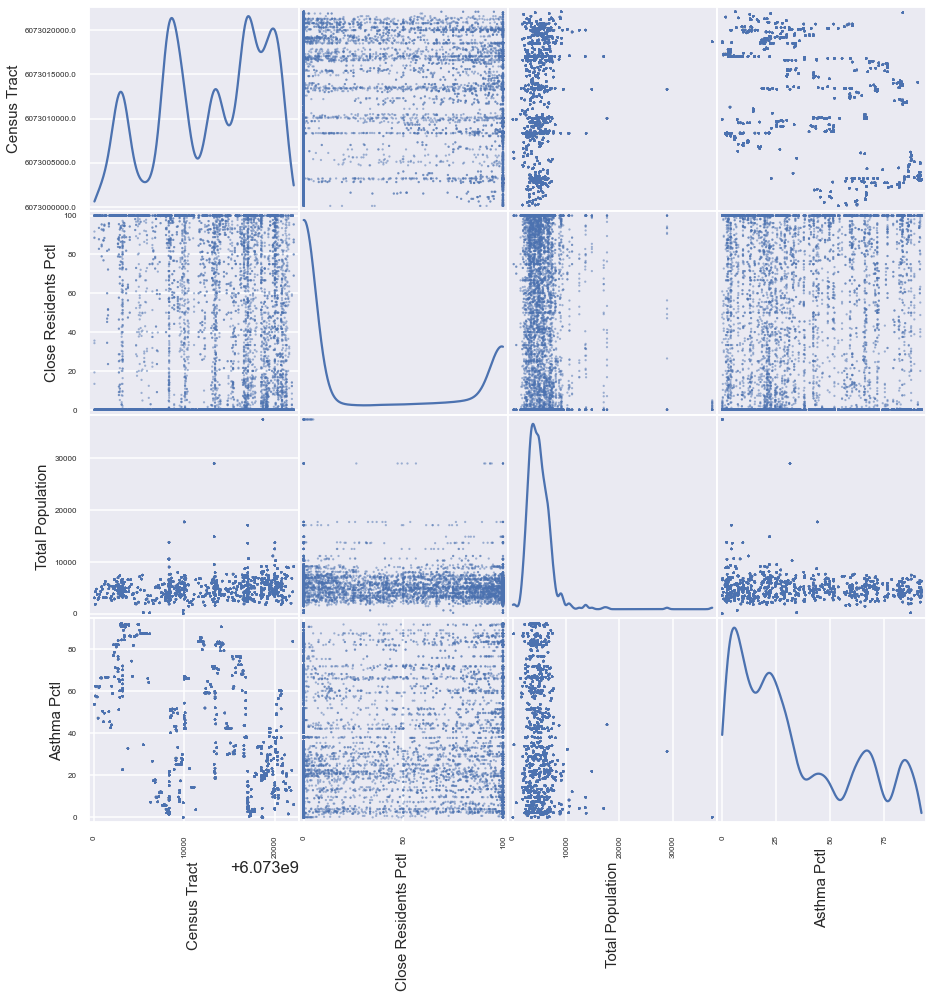

In [8]:
#Create a scatter plot matrix for df_merge
scatter_matrix = pd.plotting.scatter_matrix(
                                            df_merge, 
                                            figsize = (15,15),
                                            diagonal = 'kde',
                                            s = 20)
for matrix in scatter_matrix.ravel():
    matrix.set_xlabel(matrix.get_xlabel(), fontsize = 15, rotation = 90)
    matrix.set_ylabel(matrix.get_ylabel(), fontsize = 15, rotation = 90)

__Figure 1:__ Scatterplot matrix of columns in df_merge
<br> <br>
The relationship between the asthma percentile and the percentile of residents who live close to parks are ambiguous visually, so each data was plotted individually.

Text(0.5, 1.0, 'Asthma Percentile Distribution')

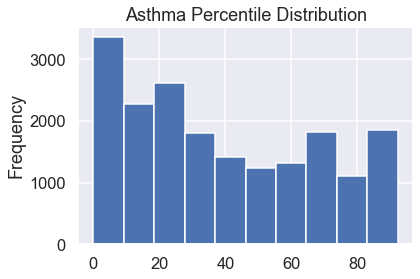

In [9]:
#Plot the frequency of asthma percentile
asthma = df_merge['Asthma Pctl'].plot(kind = 'hist', bins = 10)
asthma.set_title('Asthma Percentile Distribution')

__Figure 2:__ Asthma Percentile Distribution of minority residents living close to parks.

When taking first look at this histogram, it might be easy to misinterpret that most residents do not suffer from asthma. However, if looking closely, the frequency of those who suffer from asthma summed up would be higher than those who do not.

Text(0.5, 1.0, 'Close Residents Percentile Distribution')

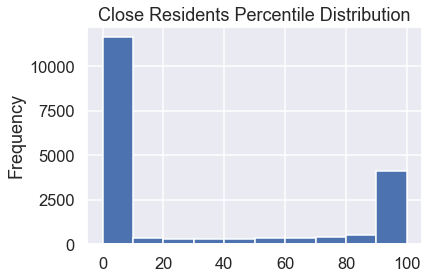

In [10]:
#Plot the frequency of close residents percentile
close = df_merge['Close Residents Pctl'].plot(kind = 'hist', bins = 10)
close.set_title('Close Residents Percentile Distribution')

__Figure 3:__ Most residents in minority communities doesn't live close to parks, but there are a number of those who does.

To ensure the best representation of the relationship between the asthma percentile and the percentile of residents close to parks, the log of these data was calculated.

In [11]:
#Drop any null and infinite values
df_merge[~df_merge.isin([np.nan, np.inf, -np.inf])].any(1)
np.seterr(divide = 'ignore')

#Transform the asthma percentile and close residents percentile to see change
df_merge['Asthma Pctl'] = np.log10(df_merge['Asthma Pctl'])
df_merge['Close Residents Pctl'] = np.log10(df_merge['Close Residents Pctl'])

Text(0.5, 1.0, 'Log of Asthma Percentile Distribution')

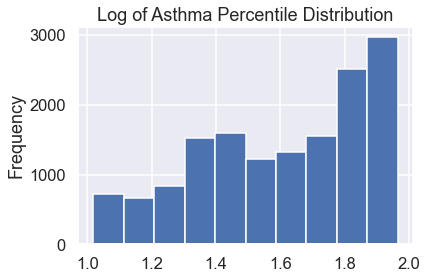

In [12]:
#Drop values less than 1 so they do not give errors
df_merge = df_merge.drop(df_merge[df_merge['Asthma Pctl'] < 1].index)

#Plot log transformation of asthma percentile
log_asthma = df_merge['Asthma Pctl'].plot(kind = 'hist', bins = 10)
log_asthma.set_title('Log of Asthma Percentile Distribution')

__Figure 4:__ Log transformation of the asthma percentile.

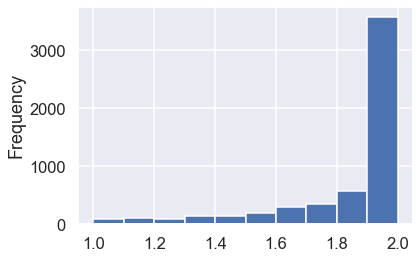

In [13]:
#Drop values less than 1 so they do not give errors
df_merge = df_merge.drop(df_merge[df_merge['Close Residents Pctl'] < 1].index)

#Plot log transformation of residents close to parks
df_merge['Close Residents Pctl'].plot(kind = 'hist', bins = 10)

__Figure 5:__ Log transformation of the percentile of residents close to parks.

Text(0.5, 1.0, 'Relationship between Asthma Percentile and Residents Close to Parks Percentile')

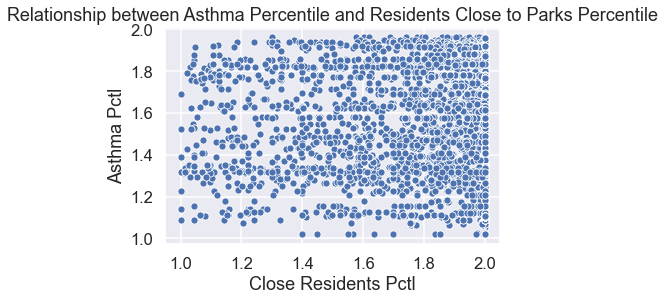

In [14]:
#Plot the log transformation of the relationship between asthma percentile and
#residents close to parks
log_asthma_close = sns.scatterplot(x = 'Close Residents Pctl', y = 'Asthma Pctl',
                               data = df_merge, s = 50)
log_asthma_close.set_title('Relationship between Asthma Percentile and Residents Close to Parks Percentile')

__Figure 6:__ Based on this scatterplot, the relationship between the asthma percentile and the percentile of residents close to parks are unclear.

Text(0.5, 1.0, 'Relationship Between Asthma Percentile and Residents Close to Parks Percentile')

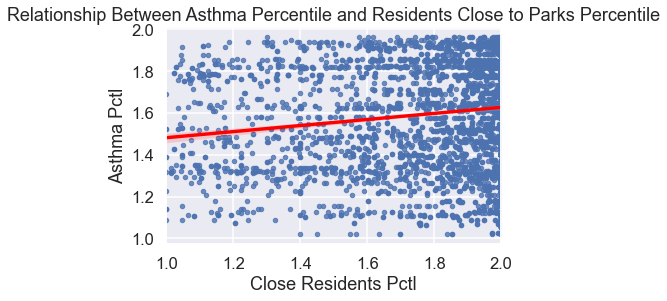

In [15]:
#Draw a best fitted line to see if there's any correlation
reg_asthma_close = sns.regplot(x = 'Close Residents Pctl', y = 'Asthma Pctl',
                               data = df_merge, line_kws={"color":"red"},
                  scatter_kws={'s':20})
reg_asthma_close.set_title('Relationship Between Asthma Percentile and Residents Close to Parks Percentile')

__Figure 7:__ It is clear that there is a positive relationship between the asthma percentile and the percentile of residents close to parks. This indicates that as the percentile of minorities who live close to parks increases, the percentile of people who has asthma also increases.

# Ethics & Privacy
Both of the datasets that are used for the analysis did not contain any information that would identify any particular person. Therefore, there is no issue privacy-wise. 
<br> <br>
Ethics-wise, since the analysis was conducted based on some minorities from one county in the US, it is possible that the result does not reflect every minority communities all over the country. Specifically, every other county was excluded except for San Diego. By including the data from the whole San Diego county instead of only including data from the San Diego city, the issue of excluding other cities that are also part of the San Diego county was reduced. 
<br> <br>
Additionally, every other ethnic race that are either not considered as minority or is unclear of what their race is, was excluded. Another issue is that every other geo types had to be excluded except for CT (Census Tract) because this is the only available geo type in the second dataset. Lastly, since these data were collected in 2010, which is 10 years prior, the information observed might not be up to date. Unfortunately, there is yet a solution to handle these three issues since this is the only available data, which can only be merged by census tract values, and the fact that there is limited information on the data regarding ethnicity.

# Conclusion & Discussion
Based on this analysis, I can conclude that having access to nearby parks does not improve the overall health of minority communities in San Diego. Therefore, the analysis does not support the initial hypothesis that living closer to parks would improve their health. 
<br> <br>
The reason for this result is the fact that there might be a correlation between the percentage of nearby parks and the percentage of pollution burden. In other words, there might be speculations that there are more parks in more polluted areas, usually in cities with a high population. Thus, it results in the positive relationship between the asthma percentile and the percentile of minorities who live close to parks. 
<br> <br> 
A limitation of the dataset describing California communities that are disproportionately burnded by multiple sources of pollution is that it only has the census tract available. If it were to have other geo types like the dataset that describes the percentage of population within half a mile of parks, more data could be included and merged. Likewise, if this dataset was more specific about the ethnic races instead of having ambiguous ones (multiple, other, and total), more minorities would also be added in the analysis, if they are within the minority ethnic group. 